In [1]:
import os
import tensorflow as tf
import numpy as np 
from PIL import Image

In [2]:
# USE GPU to run

print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

tf.config.run_functions_eagerly(True)

True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


In [4]:
# Load data

def load_data():
    cur_path = os.getcwd()+'\\'
    classes = [x for x in os.listdir(cur_path) if not x.startswith('.') and os.path.isdir(x)]
    label_set = set()
    data = []
    labels = []
    for i in classes:
        if not (i.replace(cur_path, "")).startswith('.'):
            images = os.listdir(i)
            for a in images:
                if a.endswith('.jpg'):
                    image = Image.open(i + '\\' + a)
                    image = image.resize((60, 60))
                        
                    image = np.asarray(image)
                        
                    data.append(image)
                        
                    labels.append(classes.index(i.split('\\')[-1]))
                    label_set.add(i.split('\\')[-1])

    return data, labels, len(label_set) 

data, labels, num_len = load_data()

print(len(data))
print(len(labels))

22573
22573


In [5]:
print("Amount of images: ", len(data))
print("Dimension of each image: ", data[0].shape)
print("Num length: ", num_len)


Amount of images:  22573
Dimension of each image:  (60, 60, 3)
Num length:  151


In [6]:
keep_data = [i for i in range(len(data)) if data[i].shape == (60, 60, 3)]
labels = [labels[i] for i in keep_data]
data = [data[i] for i in keep_data]
data = np.array(data)
data = data.astype('float32')/255.0
type(data)

print(data.shape)
print(labels)

(22166, 60, 60, 3)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [7]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_len)
images_len = data.shape[0]
print(labels[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


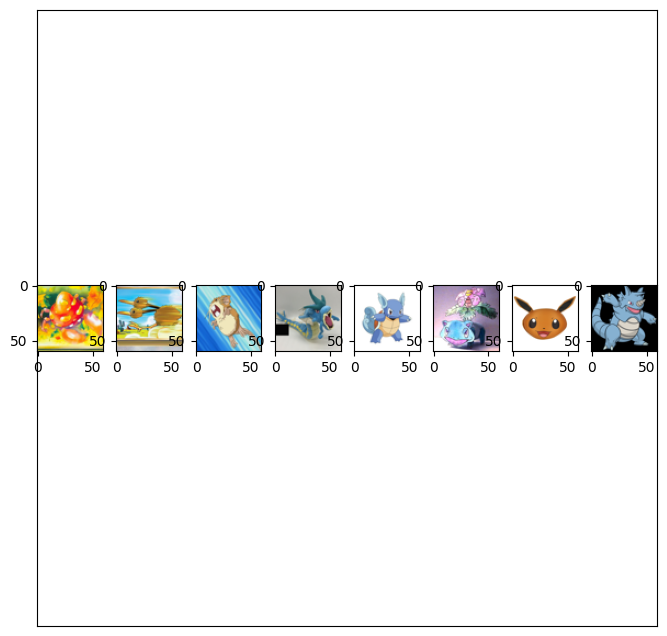

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    for i in range(len(images)):
        fig.add_subplot(1, nmax, i+1)
        plt.imshow(images[i])
    
    
def show_batch(data, nmax=64):
    random_indices = np.random.choice(images_len, nmax)
    sample_data = []
    for index in random_indices:
        sample_data.append(data[index])
    
    show_images(sample_data, nmax)
        
show_batch(data, 8)

In [9]:
# Making Discriminator Models
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, ReLU, Conv2D, LeakyReLU, BatchNormalization, Input, Flatten, Conv2DTranspose, Concatenate, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model

num_classes = num_len

condition = Input(shape=(1, 1, num_classes))
img_inputs = Input(shape=(60, 60, 3))

expanded_condition = Dense(60*60*num_classes)(condition)
expanded_condition = Reshape((60,60, num_classes))(expanded_condition)

merged_inputs = Concatenate()([expanded_condition, img_inputs])


x = Conv2D(3, (3, 3), strides=2, padding='valid')(merged_inputs)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Conv2D(16, (3, 3), strides=2, padding='valid')(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)


x = Conv2D(32, (3, 3), strides=2, padding='valid')(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Conv2D(64, (2, 2), strides=1, padding='valid')(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
dis_output = Dense(1, activation='sigmoid')(x)

discriminator = Model(inputs=[condition, img_inputs], outputs=dis_output)
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002), metrics=["accuracy"])
discriminator.summary()

optimizer = Adam(learning_rate=0.003)
loss = BinaryCrossentropy(from_logits=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 1, 151)]  0           []                               
                                                                                                  
 dense (Dense)                  (None, 1, 1, 543600  82627200    ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 reshape (Reshape)              (None, 60, 60, 151)  0           ['dense[0][0]']                  
                                                                                                  
 input_2 (InputLayer)           [(None, 60, 60, 3)]  0           []                           

In [10]:
# Build Generator Models
from tensorflow.keras.layers import Activation
latent_vector = 100

condition = Input(shape=(1, 1, num_classes,))
gen_input = Input(shape=(1, 1, latent_vector))

merged_inputs = Concatenate()([condition, gen_input])

x = Conv2DTranspose(128, 5, padding='valid', strides=1)(merged_inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# become 128 x 5 x 5
x = Conv2DTranspose(64, 5, padding='same', strides=3)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# become 64 x 15 x 15

x = Conv2DTranspose(32, 5, padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# become 32 x 30 x 30

x = Conv2DTranspose(16, 5, padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

#become 16 x 60 x 60

x = Conv2DTranspose(3, 1, padding='valid', strides=1)(x)
gen_output = Activation('tanh')(x)

generator = Model(inputs=[condition, gen_input], outputs=gen_output)
generator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002))
generator.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1, 1, 151)]  0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1, 1, 100)]  0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 251)    0           ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 5, 5, 128)   803328      ['concatenate_1[0][0]']    

(32, 1, 1, 151)
(32, 1, 1, 100)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


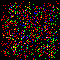

In [11]:
#Test if generator can output correct size for image
import random

batch_size = 32

seed_batch = tf.random.uniform((batch_size, 1, 1, latent_vector), minval=0, maxval=1, dtype=tf.dtypes.float32)
random_condition = tf.convert_to_tensor([labels[random.randint(0, labels.shape[0])] for i in range(batch_size)])
random_condition = tf.reshape(random_condition, [batch_size, 1, 1, num_classes])

print(random_condition.shape)
print(seed_batch.shape)
# Get som fake pokemon

images = generator.predict([random_condition, seed_batch])

img = tf.keras.preprocessing.image.array_to_img(
                images[0] * 255.0, scale=False
            )
img 

In [17]:
batch_size = 32

data = data[:-3]
labels = labels[:-3]

print(len(data))
print(len(labels))

def real_samples(dataset, categories, n):
    index = np.random.randint(0, dataset.shape[0], n)
    X, cat_labels = [dataset[i] for i in index], [categories[i] for i in index]
    
    y = np.ones((n, 1))
    return [np.array(X), tf.reshape(np.array(cat_labels), [n, 1, 1, num_classes ])], y

def latent_vector(latent_dim, n, n_cats):
    latent_input = np.random.randn(latent_dim*n)
    latent_input = latent_input.reshape(n, 1, 1, latent_dim)
    cat_labels = tf.reshape(to_categorical(np.random.randint(0, n_cats, n), n_cats), [n,1,1,n_cats])
    return [latent_input, cat_labels]

def fake_samples(generator, latent_dim, n, num_classes):
    latent_output, cat_labels = latent_vector(latent_dim, n, num_classes)
    X = generator.predict([cat_labels, latent_output])
    y = np.zeros((n, 1))
    return [X, cat_labels], y 
   

22160
22160


In [18]:
# Training function

latent_dim = 100
"""
@tf.function
def train_step(real_images):
    random_latent_vectors = tf.random.normal(shape=(batch_size, 1, 1,latent_dim))
    generated_images = generator(random_latent_vectors)
    combined_images = tf.concat([generated_images, real_images], axis=0)
    
    labels = tf.concat(
        [tf.ones((batch_size, 1)), tf.zeros((real_images.shape[0], 1))], axis=0
    )
    
    labels += 0.05 * tf.random.uniform(labels.shape)
   
    with tf.GradientTape() as tape:
        predictions = discriminator(combined_images)
        d_loss = loss(labels, predictions)
    grads = tape.gradient(d_loss, discriminator.trainable_weights)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_weights))
    
    
    random_latent_vectors = tf.random.normal(shape=(batch_size, 1, 1, latent_dim))
    misleading_labels = tf.zeros((batch_size, 1))
    
    with tf.GradientTape() as tape:
        predictions = discriminator(generator(random_latent_vectors))
        g_loss = loss(misleading_labels, predictions)
    grads = tape.gradient(g_loss, generator.trainable_weights)
    optimizer.apply_gradients(zip(grads, generator.trainable_weights))
    return d_loss, g_loss, generated_images
"""

def def_gan(generator, discriminator):
    discriminator.trainable = False
    
    gen_label, gen_latent = generator.input
    gen_output = generator.output
    
    
    gan_output = discriminator([gen_label, gen_output])
    
    model = Model([gen_latent, gen_label], gan_output)
    
    model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

gan_model = def_gan(generator, discriminator)
gan_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1, 1, 151)]  0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1, 1, 100)]  0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 251)    0           ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 5, 5, 128)   803328      ['concatenate_1[0][0]']    

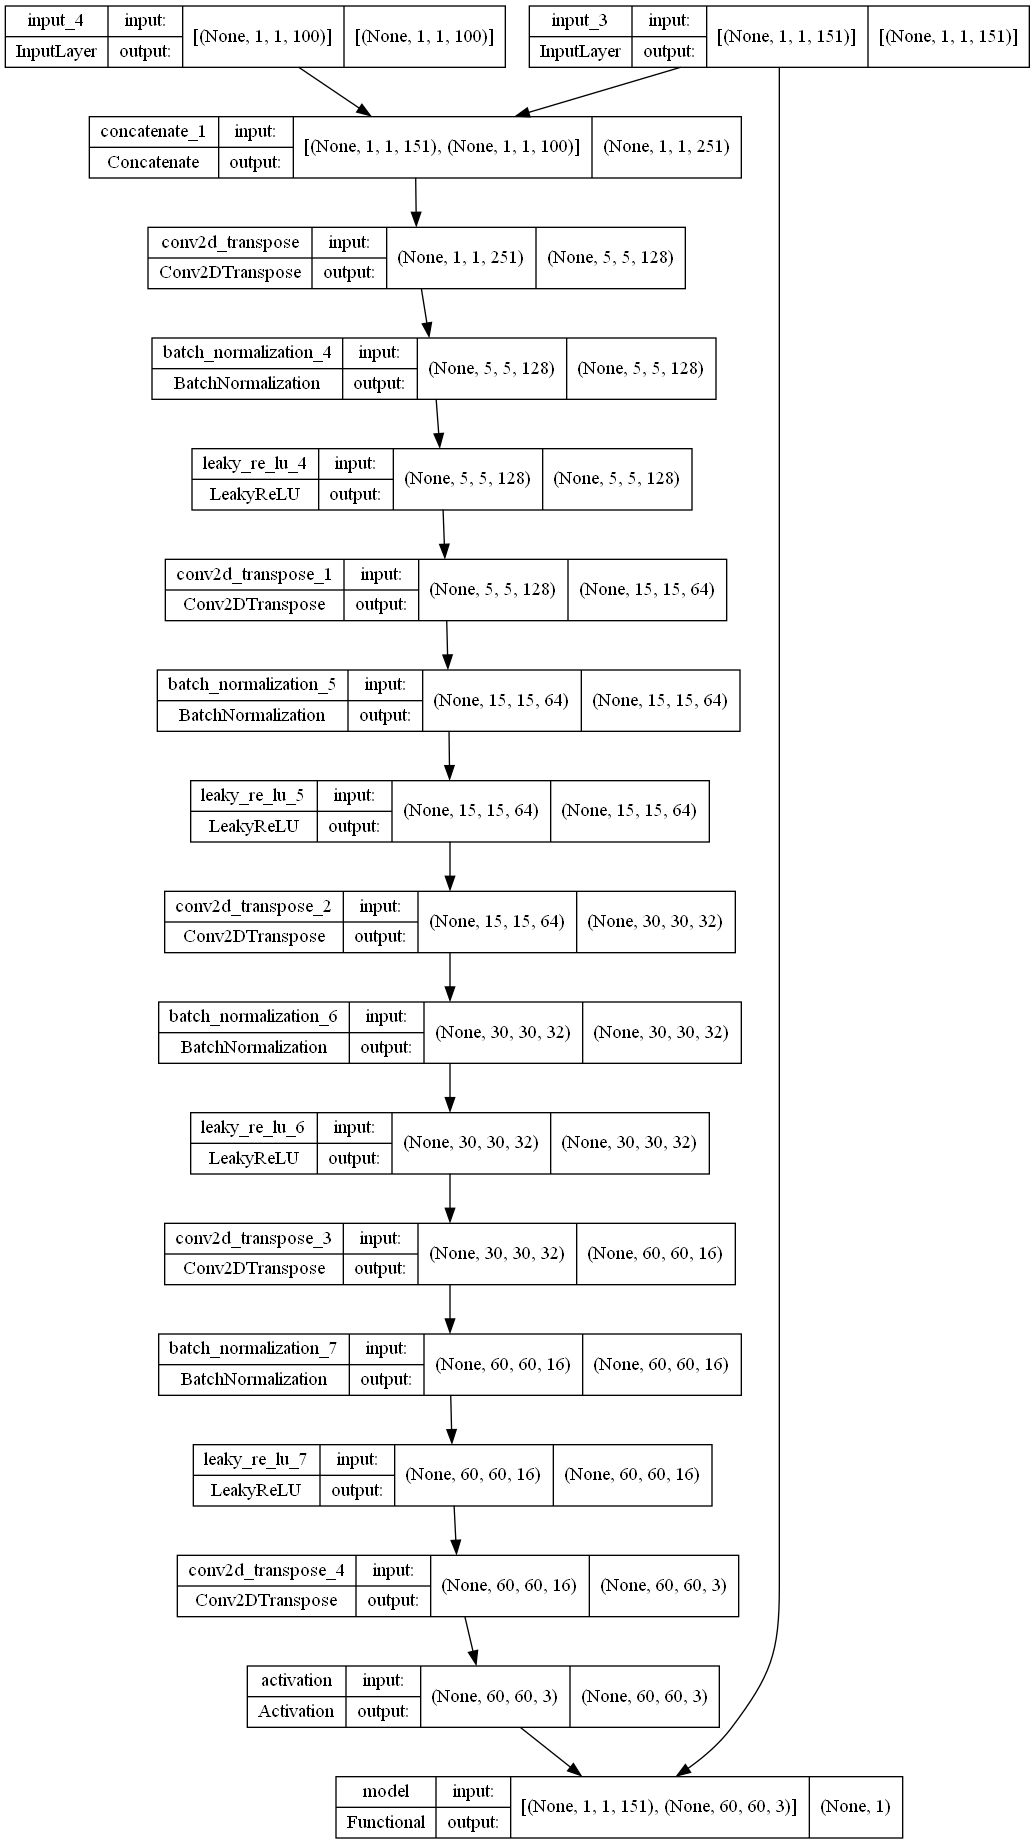

In [19]:
plot_model(gan_model, show_shapes=True, show_layer_names=True)

In [20]:
epochs = 20
"""
for epoch in range(epochs):
    print("Start epoch: ", epoch)
    for step, real_images in enumerate(new_data):
        d_loss, g_loss, generated_images = train_step(real_images)
        
        if step % 200 == 0:
            print("Discriminator loss at step %d: %0.2f" % (step, d_loss))
            print("Generator loss at step %d: %0.2f" % (step, g_loss))
            
            img = tf.keras.preprocessing.image.array_to_img(
                generated_images[0] * 255.0, scale=False
            )
            img.save(os.path.join(os.getcwd(), "generated_img" + str(step) + ".png"))
"""

def show_fakes(generator, latent_dim, n=10):
    x_fake, y_fake = fake_samples(generator, latent_dim, 10, num_classes)
    
    X_tst = (x_fake[0])
    
    # Display fake (generated) images
    fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
    k=0
    for i in range(0,2):
        for j in range(0,5):
            axs[i,j].matshow(X_tst[k], cmap='gray')
            axs[i,j].axis('off')
            k=k+1
    plt.show() 

def train(generator, discriminator, gan_model, dataset, categories, latent_dim, epochs, batch_size):
    batch_per_epoch = int(dataset.shape[0] / batch_size)
    print("batch_per_epoch: ", batch_per_epoch)
    
    half_batch = int(batch_size/2)
    
    for i in range(epochs):
        for j in range(batch_per_epoch):
            # Discriminator training
            [x_real, cat_labels_real], y_real = real_samples(dataset, categories, half_batch)
            d_loss1, _ = discriminator.train_on_batch([cat_labels_real, x_real], y_real)
            
            [x_fake, cat_labels_fake], y_fake = fake_samples(generator, latent_dim, half_batch, num_classes)
            d_loss2, _ = discriminator.train_on_batch([cat_labels_fake, x_fake], y_fake)
            
            
            # Generator training
            [latent_input, cat_labels] = latent_vector(latent_dim, batch_size, num_classes)
            y_gan = np.ones((batch_size, 1))
            g_loss = gan_model.train_on_batch([latent_input, cat_labels], y_gan)
            
        print(f"epoch: {i}, d_loss_real: {d_loss1}, d_loss_fake: {d_loss2}, g_loss: {g_loss} ")
        show_fakes(generator, latent_dim)
            
            
            


batch_per_epoch:  692
epoch: 0, d_loss_real: 0.00019881478510797024, d_loss_fake: 0.00011677358270389959, g_loss: 0.001292087254114449 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

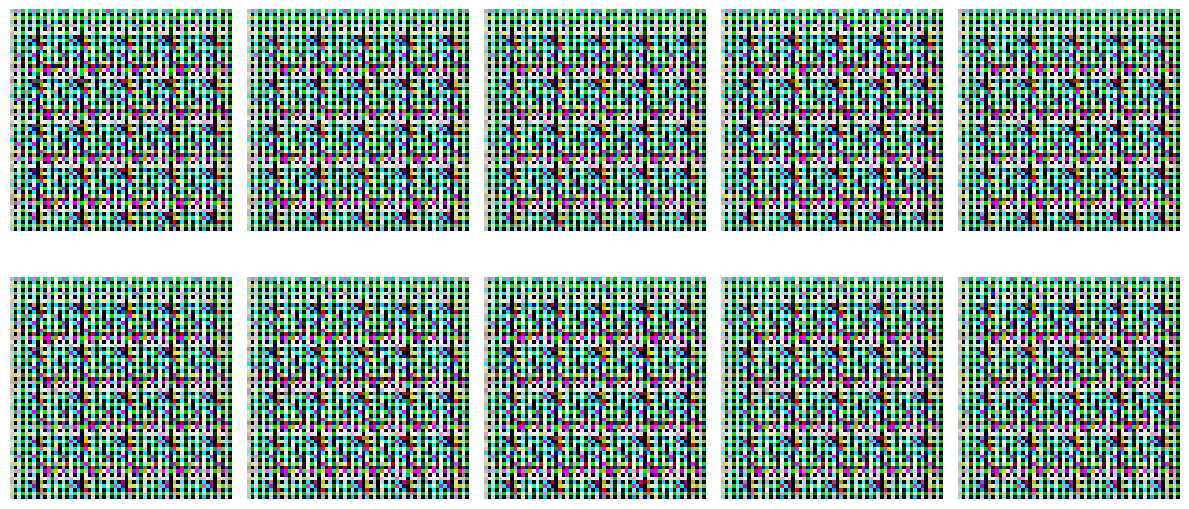

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 1, d_loss_real: 2.4155466235242784e-05, d_loss_fake: 9.407780453329906e-06, g_loss: 0.00010853093408513814 


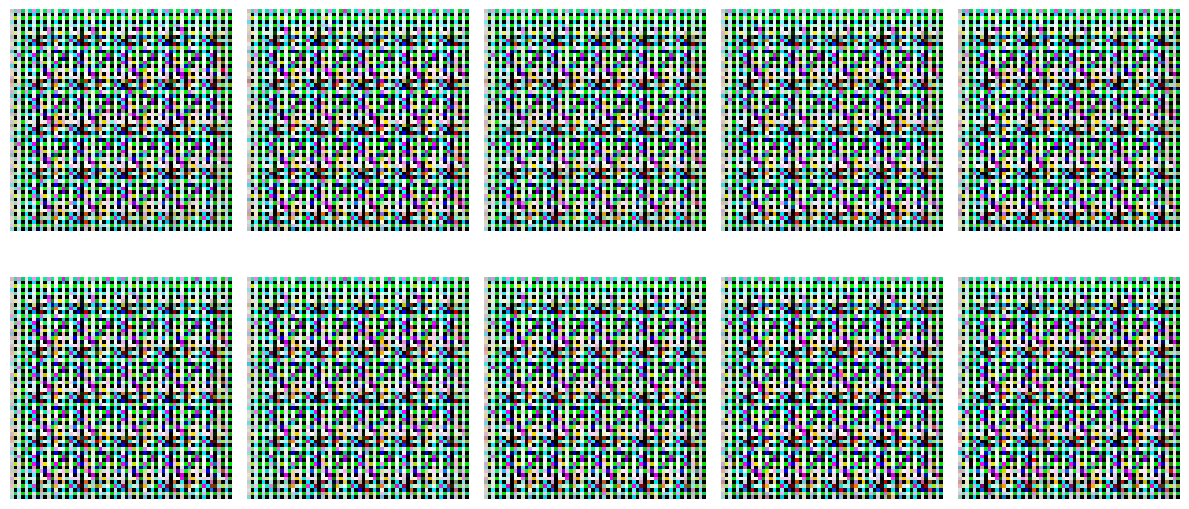

epoch: 2, d_loss_real: 8.071635420492385e-06, d_loss_fake: 3.0496605631924467e-06, g_loss: 3.65962041541934e-05 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

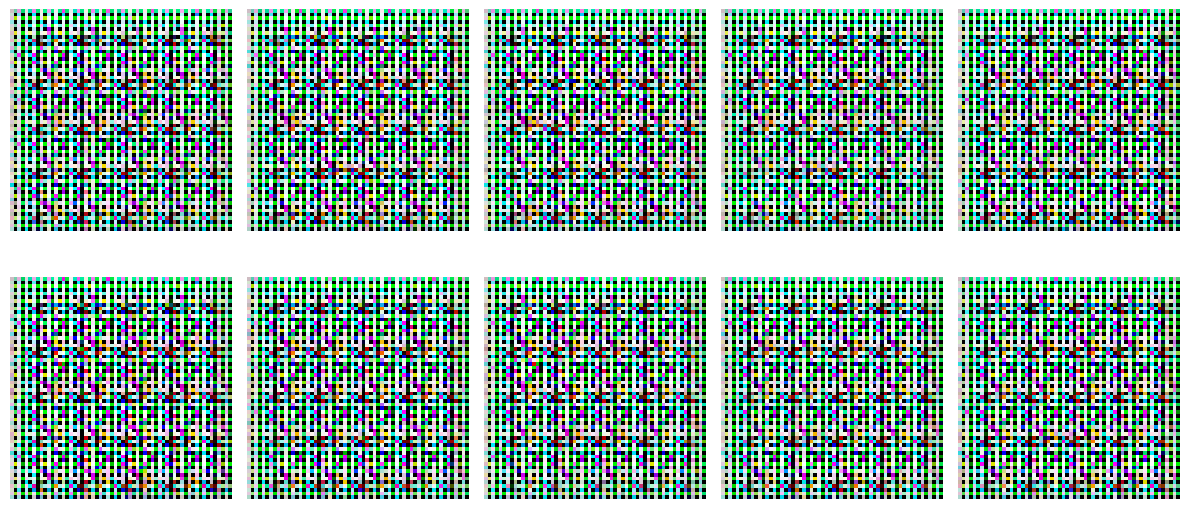

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 3, d_loss_real: 6.483604124696285e-07, d_loss_fake: 8.022331599022436e-07, g_loss: 1.1825686669908464e-05 


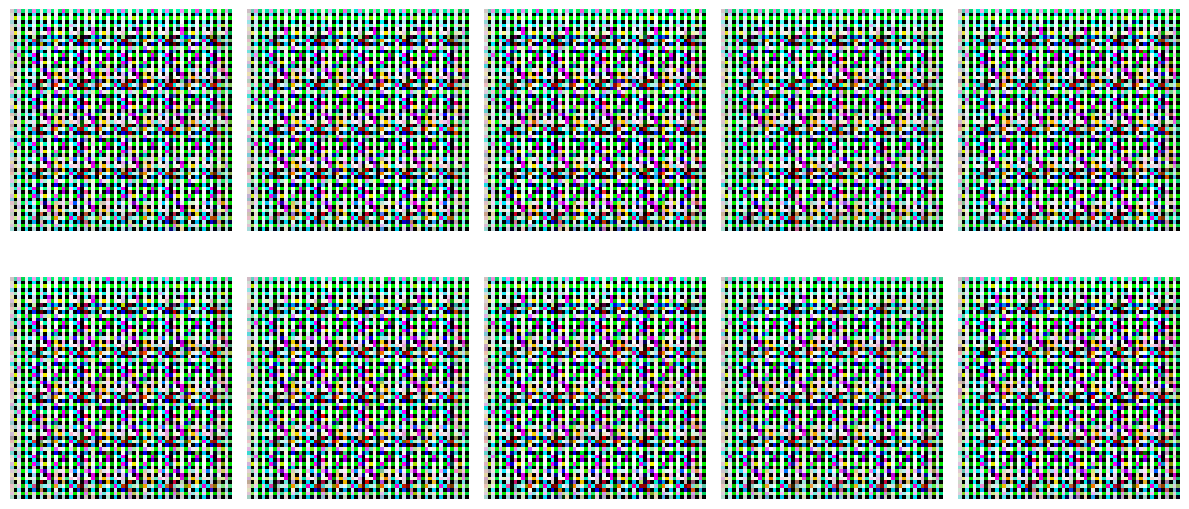

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4, d_loss_real: 1.4088420812186087e-06, d_loss_fake: 7.905021561782632e-07, g_loss: 8.71586689754622e-06 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


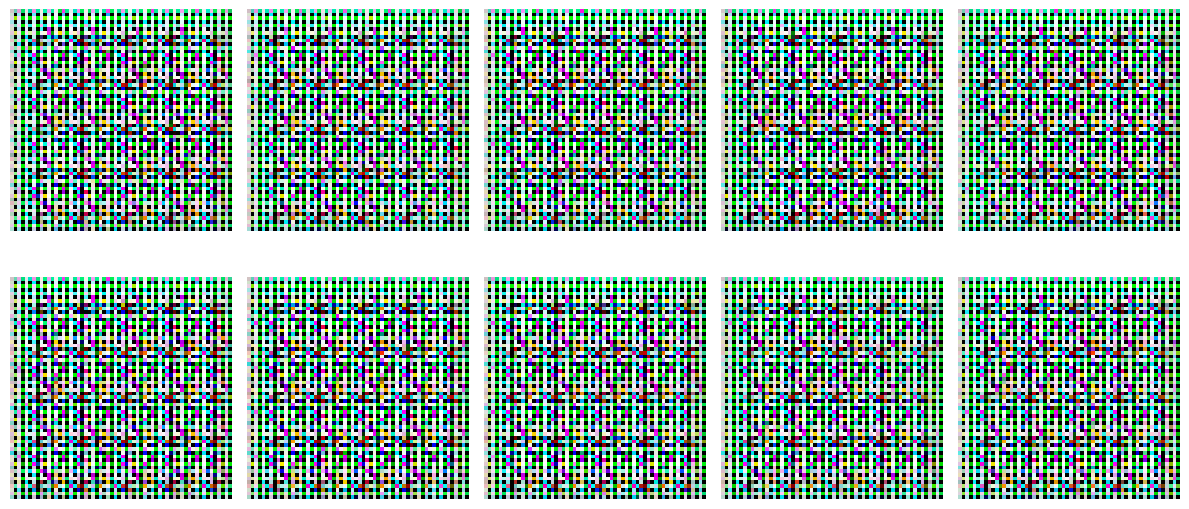

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 5, d_loss_real: 5.599389965027513e-07, d_loss_fake: 3.108001465079724e-07, g_loss: 2.7628209409158444e-06 


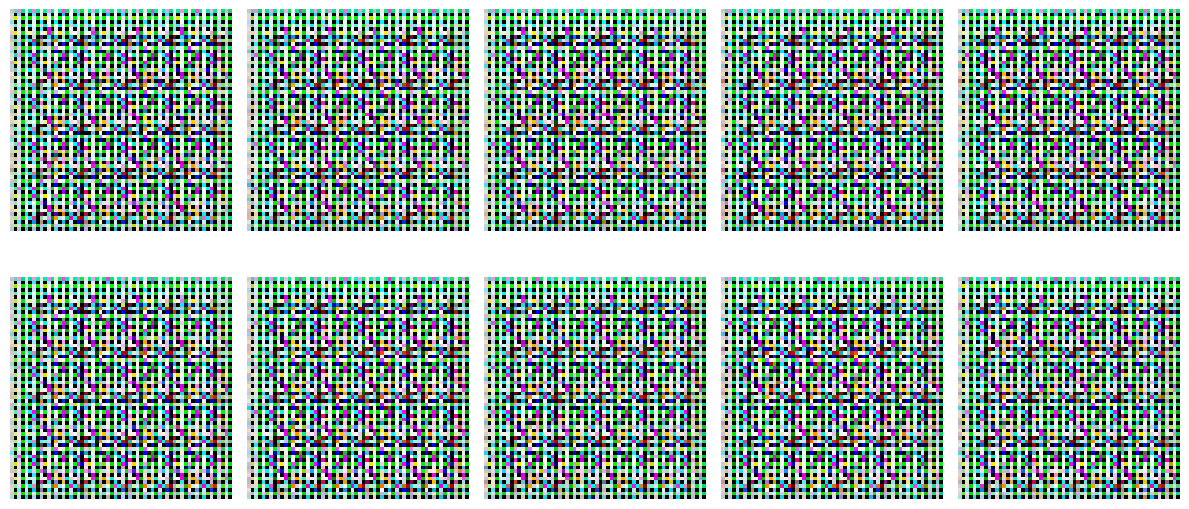

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 6, d_loss_real: 3.2563730201218277e-07, d_loss_fake: 4.9774946830893896e-08, g_loss: 2.0617239897546824e-06 


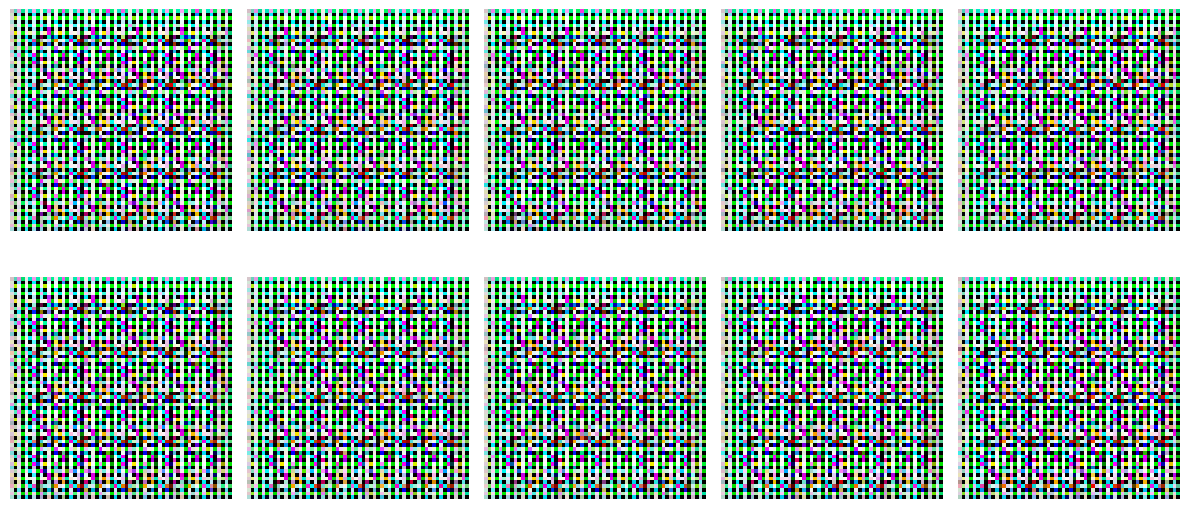

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7, d_loss_real: 9.056599736823046e-08, d_loss_fake: 1.2578653674211182e-08, g_loss: 1.300656776948017e-06 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


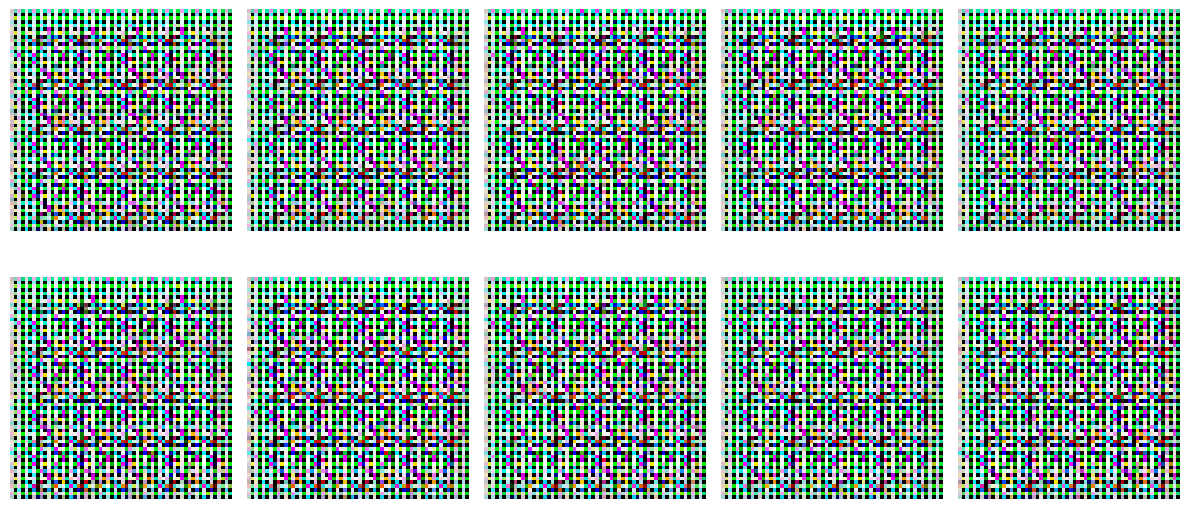

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 8, d_loss_real: 7.155986025964012e-08, d_loss_fake: 6.884981473831431e-09, g_loss: 6.003845101076877e-07 


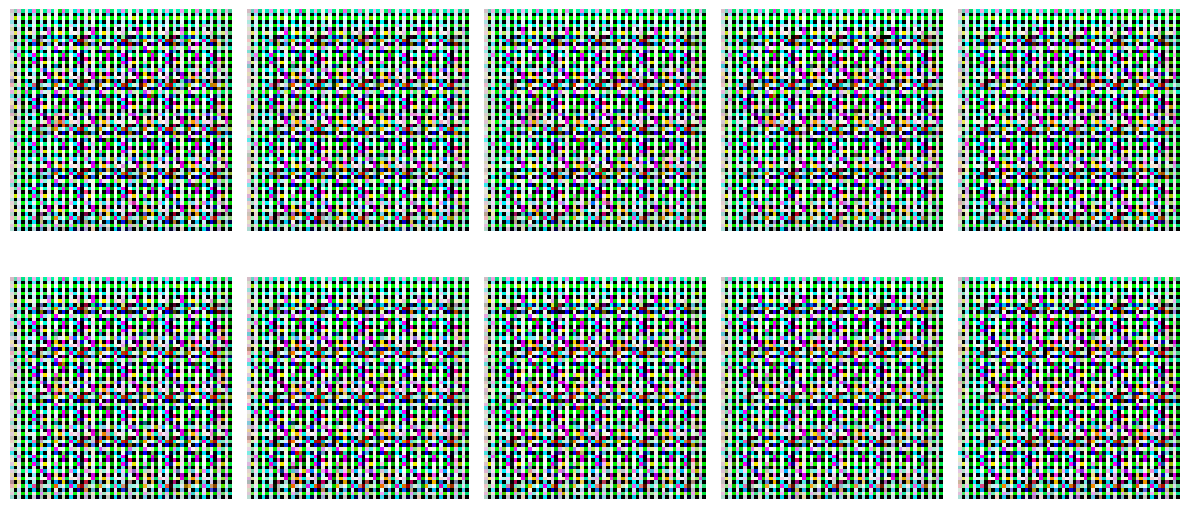

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9, d_loss_real: 1.6612105468993832e-08, d_loss_fake: 5.2288746665851704e-09, g_loss: 4.0424902181257494e-07 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


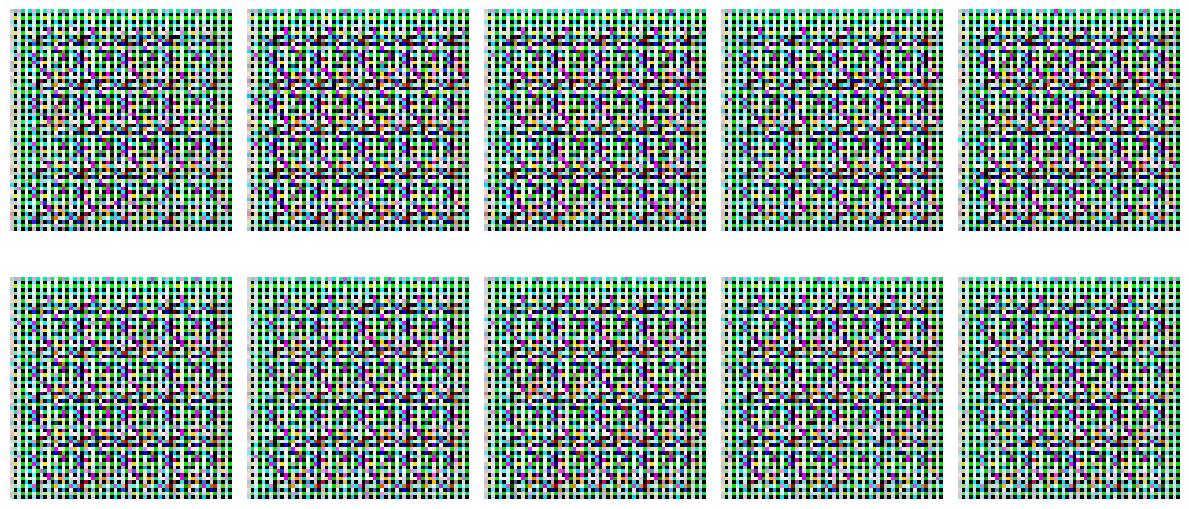

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 10, d_loss_real: 9.1832150772575e-09, d_loss_fake: 3.847740792650711e-09, g_loss: 3.657303864201822e-07 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


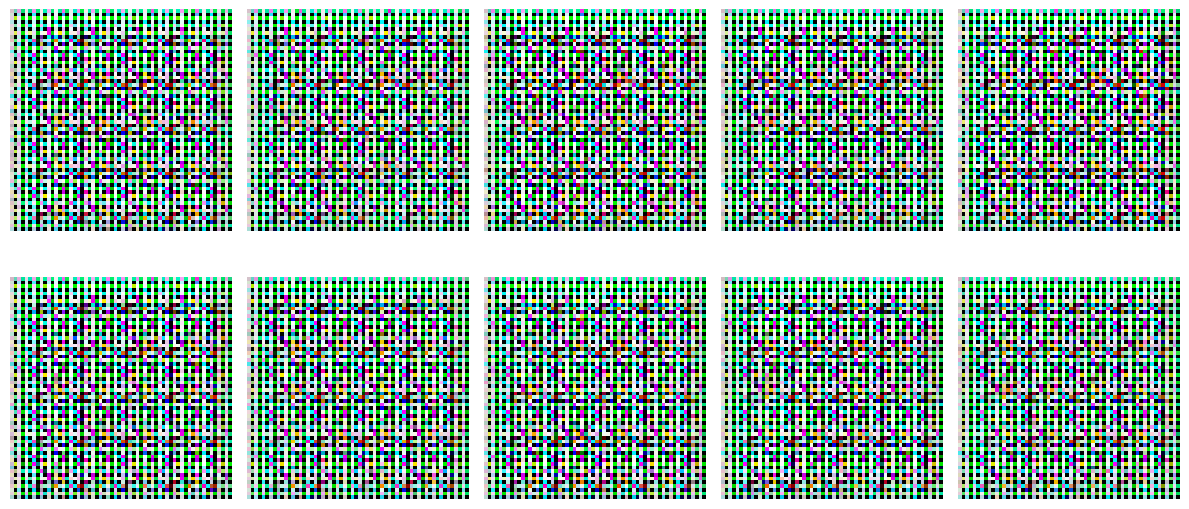

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 11, d_loss_real: 7.473540009073076e-09, d_loss_fake: 3.871811760092214e-10, g_loss: 1.581471877898366e-07 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


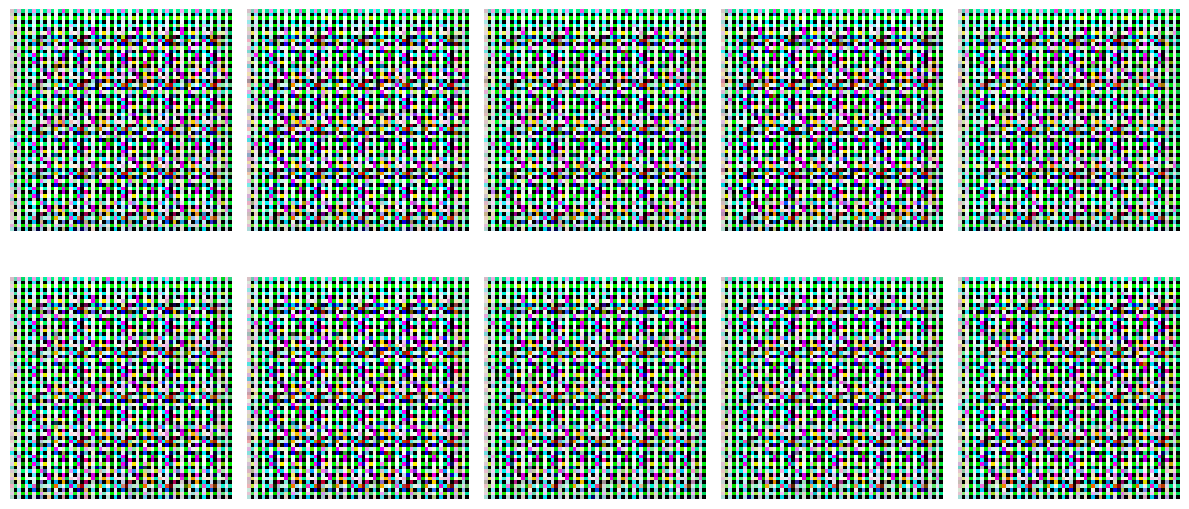

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 12, d_loss_real: 2.6279307618892744e-09, d_loss_fake: 6.371366212398755e-10, g_loss: 6.266834873258631e-08 


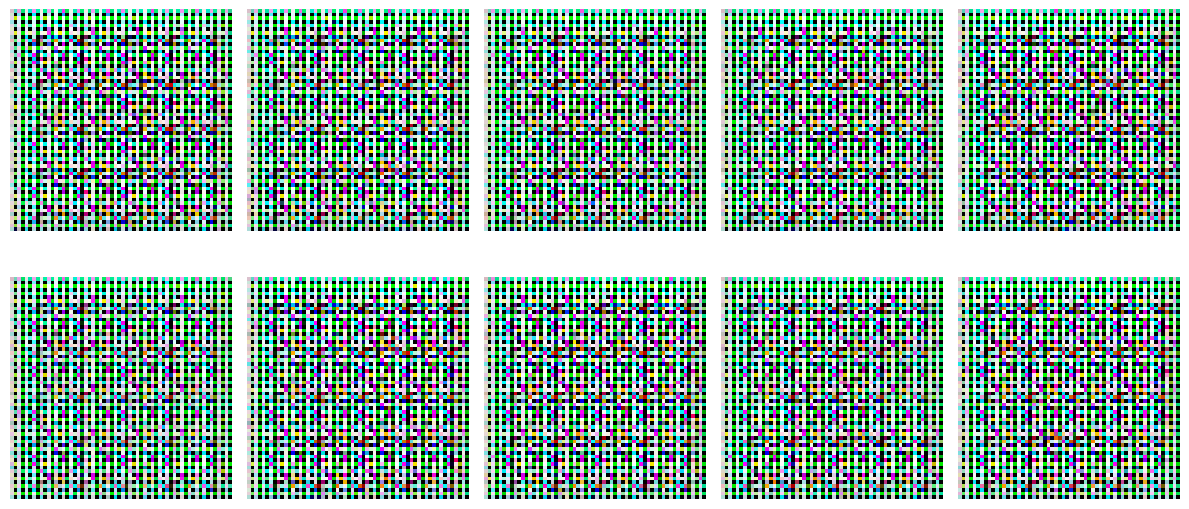

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 13, d_loss_real: 6.075328684573833e-09, d_loss_fake: 2.449541680604739e-10, g_loss: 5.719854812014091e-08 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


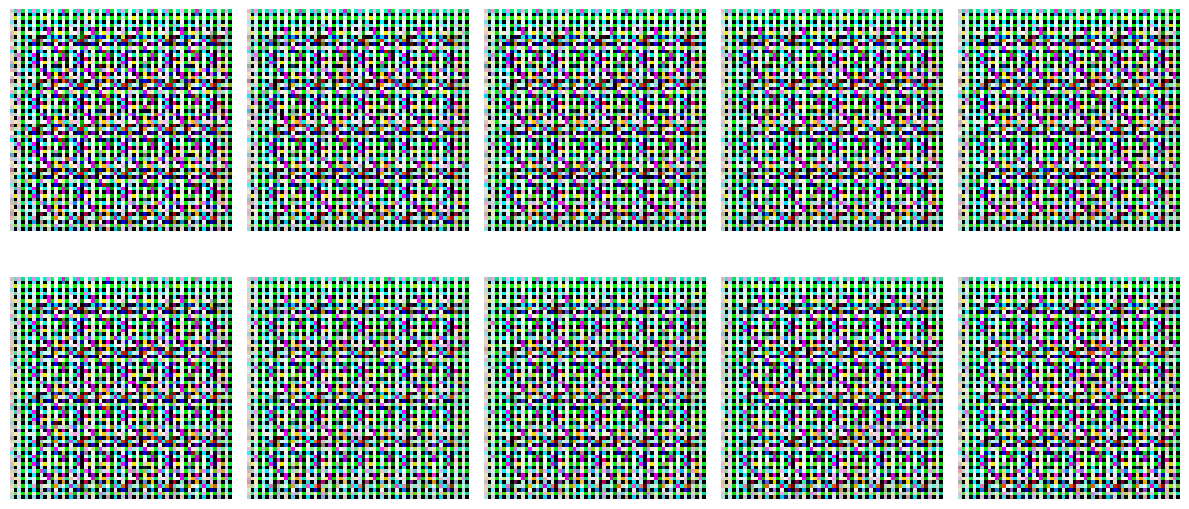

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 14, d_loss_real: 4.2633230279420786e-10, d_loss_fake: 3.133941439692478e-10, g_loss: 1.3410657473400533e-08 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


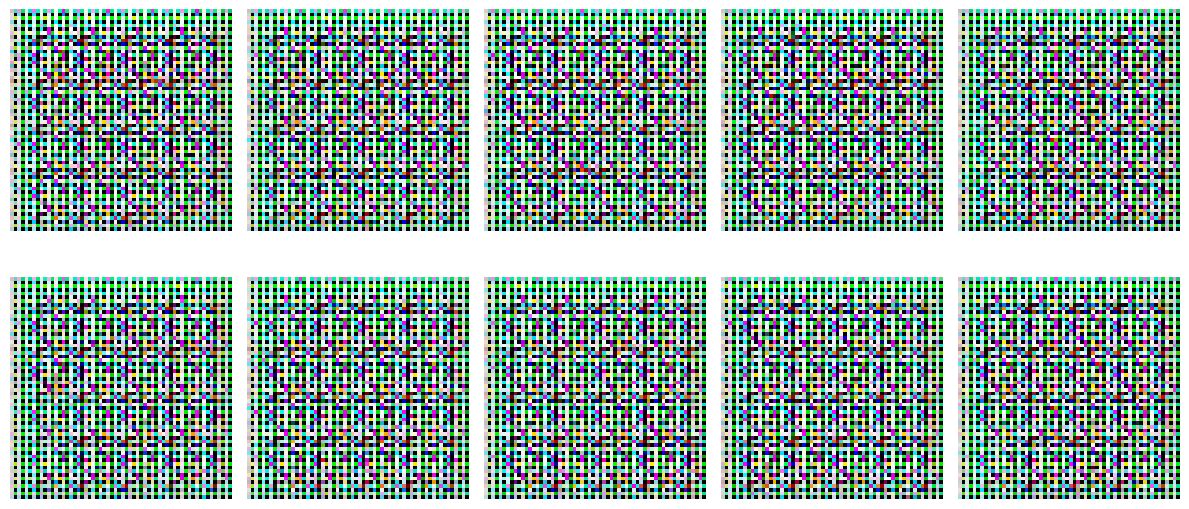

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 15, d_loss_real: 1.4300065576122734e-09, d_loss_fake: 9.754778235171457e-11, g_loss: 1.4382167456972184e-08 


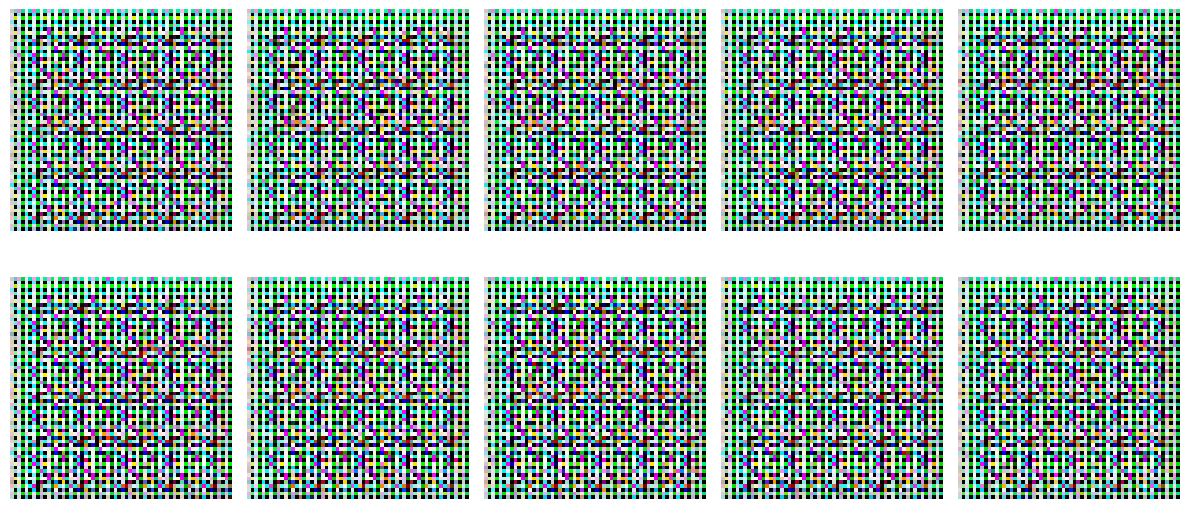

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 16, d_loss_real: 3.1192159966053623e-10, d_loss_fake: 1.5782524592777847e-11, g_loss: 1.4010846705048152e-08 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


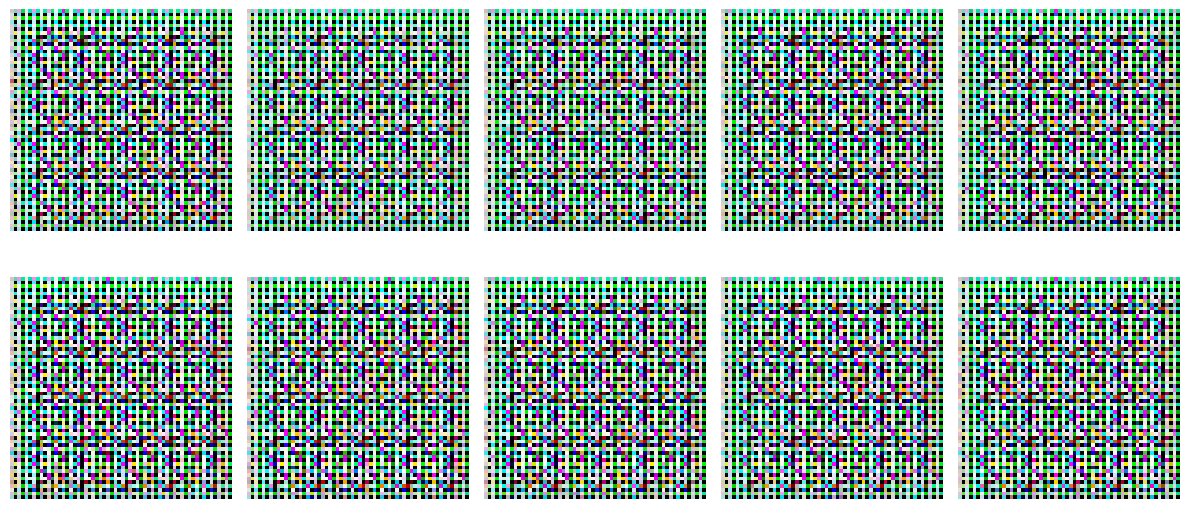

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 17, d_loss_real: 6.10748535079253e-11, d_loss_fake: 4.8166311217290314e-11, g_loss: 3.3705263025041177e-09 


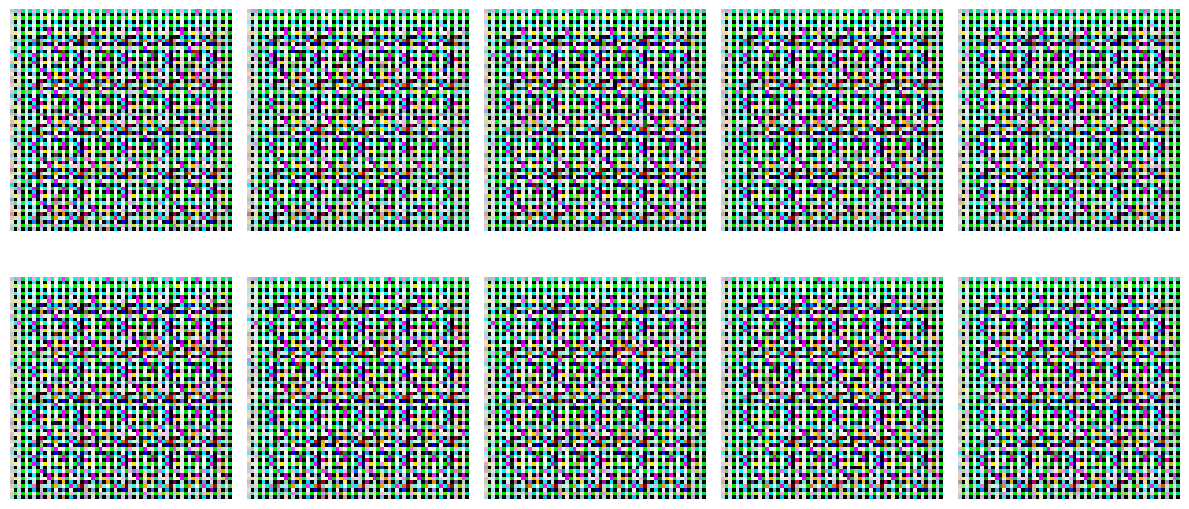

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 18, d_loss_real: 4.2142150880053464e-11, d_loss_fake: 7.441074145742022e-11, g_loss: 1.2962328987953242e-09 


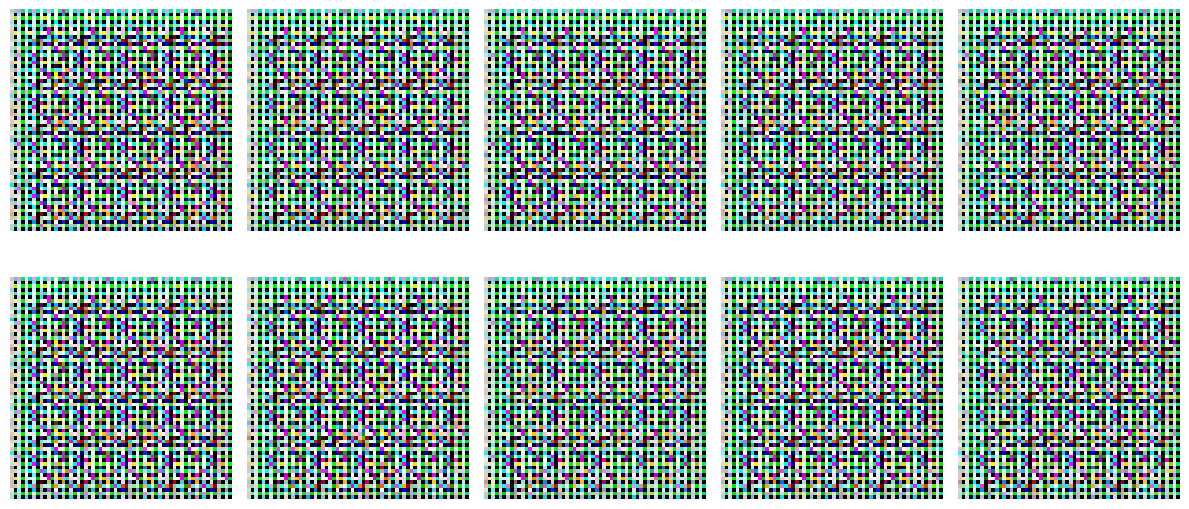

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

epoch: 19, d_loss_real: 5.072463282740358e-11, d_loss_fake: 1.6484997394927703e-11, g_loss: 2.3266859550119534e-09 


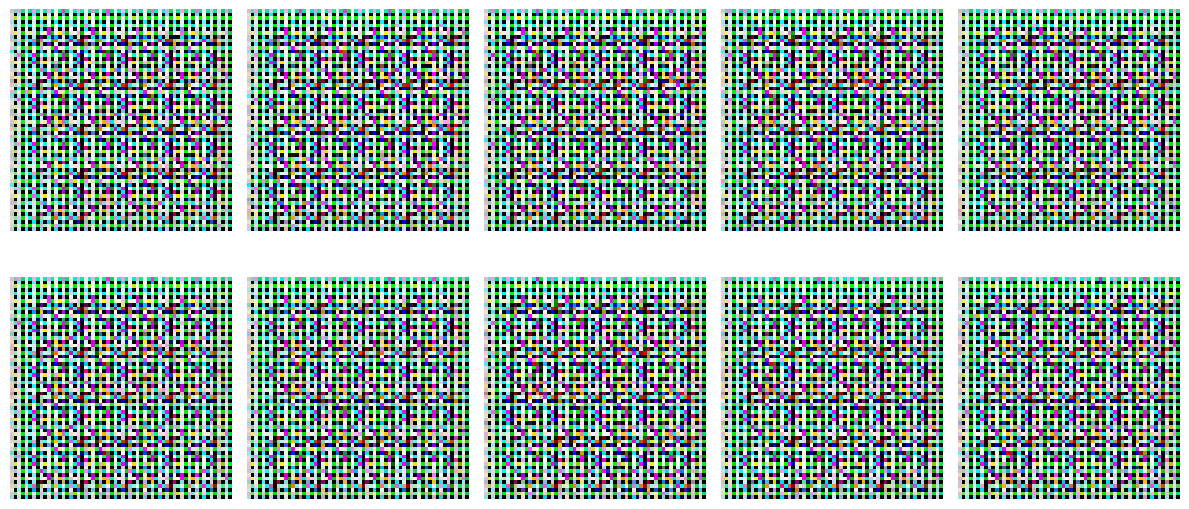

In [21]:
train(generator, discriminator, gan_model, data, labels, latent_dim, epochs, batch_size)